In [1]:
%cd /content/drive/MyDrive/LGDXSCHOOL 2기/신규가치분석

/content/drive/MyDrive/LGDXSCHOOL 2기/신규가치분석


<center>  
<img src="https://arome1004.cafe24.com/images/machine_learning/dcx12.png" width=80%>   
</center>

# 신규가치 분석 진행 순서
> 고객 데이터를 분석할 때 3가지 관점에서 분석
> 1. Actor : 고객 데이터 분석을 통해서 페르소나를 정의 -> 고객의 Need, Pain point 도출
> 2. Action : Need/Pain point를 충족/해소 시킬 수 있는 행동
> 3. Artifact : Action을 수행하기 위한 매개체

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('./data/머니케어.xlsx')
df.head() # 금융, 가계부, 예금, 대출 등과 관련된 사용자 텍스트 데이터

,time,review
0,2023. 5. 30. 17:09,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 ...
1,2022. 10. 9. 22:41,신혼부부가계부 신혼부부 가계부화목 화목 신혼부부 가계부입당 화연휴 끝나고 오랜만에 ...
2,2022. 7. 2. 4:34,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 ...
3,2022. 7. 6. 5:19,카카오뱅크 청년전세자금대출 연장 년 금리변동 카카오뱅크 청년전세자금대출 서류금리...
4,2022. 8. 15. 18:08,우당탕탕 다신 안가고싶은 삼성병원 가지베이컨그라탕해먹기 미친 폭우랑 전쟁하기 ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    1019 non-null   object
 1   review  1019 non-null   object
dtypes: object(2)
memory usage: 16.1+ KB


## 1. 데이터 전처리
- 1.1 특수문자 제거
- 1.2 의미없는 짧은 글 제거

### 1.1 특수문자 제거
- 정규표현식(Regular Expression) 활용

In [5]:
import re

In [6]:
pattern = r'[^a-zA-Z0-9가-힣\s\.\?\!]'
# r : 원시문자열 (정규표현식 패턴 잡을 때 많이 활용)

In [7]:
# 특수문자 제거
new_reviews = []
for review in df['review']:
  text = re.sub(pattern,"",review)
  new_reviews.append(text)

In [8]:
new_reviews[:2]

['나의 가계부 지출  년 월 생활비 정산 만 원 가계부  인 가구 자취 생활비 식비 아끼기 고정지출 생활비 아끼기 무지출 직장인 짠테크 벌써 가계부를 작성한지 개월이 되었습니다월 생활비 원 월 생활비 원 월 생활비 원지난달 대비 원 오바가계부를 쓰고 있다는 게 의미가 없을 정도로비슷비슷한 개월 사실 이번 달 초부터저녁 약속 시험 원서 접수비 고양이 용품 등화끈하게 돈을 써버렸기 때문에남은 한 달을 쪼들린 사람 이츠미 그래도 이번 달은 당근 거래로무려 원이나 벌었답니다당근 거래 처음 해봐서떨려 했던 애송이는 중고거래 만렙이 되었습니다 이번 달은 갑작스럽게 생긴 약속이 있어서예상 비용은 벗어났지만그래도 힐링할 수 있어서 좋은 지출이었다고 봅니다 고양이 모래가 한 달에 만 원씩 들 줄은 몰랐습니다고양이 간식 밥 장난감도 아닌모래가 제일 비쌉니다 이번 달에 타투를 안 했다면 전월보다덜 썼던 거였는데 말이죠 하하후회는 전혀 없습니다이제부터는그저 가계부를 작성하는 것이 아닌분석을 해야겠습니다 외식 식비 공부 고양이 약 기타 약속을 줄이는 것밖에는 답이 없습니다물가가 후덜덜하네요월은 여름휴가 제외하고는공부에 열중할 터라생활비 만 원으로 목표해 보겠습니다파이팅 ',
 '신혼부부가계부 신혼부부 가계부화목 화목 신혼부부 가계부입당 화연휴 끝나고 오랜만에 출근하니너무 힘들어요 힘든 몸을 이끌고 끌려가는 필라테스 그래도 다녀오면 잘했다 싶어요 식빵 들고 집으로저녁은 김치찌개 수손목도 아프고 발목도 점점 아파와요출근길에 포인트로 발목보호대 구매 출근 못 할거 같았지만 합니다 퇴근후 오후에 병원에 갔어야했는데 퇴근하니 좀 나은거같아 그냥 집에가서 쉬었어요 저녁먹고 야식으로 시장곱창 목또 아침에 일어나니 발목이 아파요출근 못하나 했지만 합니다 출근전 병원가서 약처방 받고 열일 여기저기 안아픈곳이없네요 퇴근해서 오랜만에 샐러드 그리고 토포샵 겅부다음주부터 포토샵 일러스트 학원에 다닐거라 틈틈히 유튭 보고 공부중입니다 경제적자유를 앞당기자 ']

In [9]:
# 컬럼 추가
df['review_clean'] = new_reviews
df.head(3)

,time,review,review_clean
0,2023. 5. 30. 17:09,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 ...,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 ...
1,2022. 10. 9. 22:41,신혼부부가계부 신혼부부 가계부화목 화목 신혼부부 가계부입당 화연휴 끝나고 오랜만에 ...,신혼부부가계부 신혼부부 가계부화목 화목 신혼부부 가계부입당 화연휴 끝나고 오랜만에 ...
2,2022. 7. 2. 4:34,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 ...,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 ...


### 1.2 의미없는 짧은 글 제거

In [10]:
# 글자 개수 10개 기준으로 짧은 글 제거
drop_indices = [] # 삭제할 인덱스 담아둘 리스트
for i, review in enumerate(df['review_clean']):
  if len(review) < 10:
    drop_indices.append(i)

print(drop_indices)

[]


- 글자수 10개 미만은 없음!

```python
# 삭제하고자 하는 경우
df.drop(drop_indices)
```

## 2. 토큰화 - 형태소 분리
- 2.1 형태소 분리, 어간 추출, 정규화, 원하는 품사 추출, 불용어 제거
- 2.2 DF에 추가

### 2.1 형태소 분리, 어간 추출, 정규화, 원하는 품사 추출, 불용어 제거

In [11]:
# 불용어 사전 로드
stopwords_df = pd.read_csv('./data/ko-stopwords.csv')
stopwords_df.head()

,stopwords
0,가
1,가까스로
2,가령
3,각
4,각각


In [12]:
# list 형변환 -> 불용어 제거에 활용
stopwords_list = list(stopwords_df['stopwords'])
stopwords_list[:5]

['가', '가까스로', '가령', '각', '각각']

In [13]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 36.0 MB/s eta 0:00:00


| 분석기    | 속도        | 정확도        | 특징                                                         | 장단점                                                         |
|-----------|-------------|---------------|--------------------------------------------------------------|----------------------------------------------------------------|
| **Mecab** | 매우 빠름   | 높음          | - 백터 기반의 빠른 분석<br>- 대용량 데이터 처리에 적합          | + **장점:** 속도 및 효율성 우수<br>- **단점:** 설치가 다소 복잡, 사전 관리 필요 |
| **Kkma**  | 느림        | 높음          | - 문장 단위의 세밀한 분석 제공<br>- 다양한 형태소 정보 리턴       | + **장점:** 상세 분석, 문맥 파악 용이<br>- **단점:** 속도 느림, 대용량 데이터에 부적합 |
| **Hannanum** | 보통     | 중간          | - KAIST 개발 분석기로 전통적 접근법 사용<br>- 기본 문법 규칙 기반  | + **장점:** 비교적 안정적인 결과 제공<br>- **단점:** 문맥 반영 미흡, 업데이트 한계  |
| **Komoran** | 보통       | 높음          | - 최신 알고리즘 일부 적용<br>- 딥러닝 요소 도입 가능             | + **장점:** 높은 정확도, 견고한 성능<br>- **단점:** 옵션 및 커스터마이징 제한       |
| **Okt**   | 빠름        | 중간 ~ 높음   | - 소셜 미디어(예: 트위터) 문체에 최적화<br>- 감성 분석 등 특화       | + **장점:** 사용법 간편, 빠른 처리<br>- **단점:** 복잡한 문장 분석에는 한계, 단어 세분화 미흡 |

In [14]:
from konlpy.tag import Okt

In [15]:
okt = Okt() # 객체 생성

In [16]:
# 테스트 (품사태깅)
temp=okt.pos("고양이가 세상을 구한다고 ㅋㅋㅋㅋ", stem=True, norm=True) # stem: 어간추출, norm: 정규화(표준화된 형태소)
temp

[('고양이', 'Noun'),
 ('가', 'Josa'),
 ('세상', 'Noun'),
 ('을', 'Josa'),
 ('구한', 'Noun'),
 ('다', 'Adverb'),
 ('고', 'Noun'),
 ('ㅋㅋㅋ', 'KoreanParticle')]

In [17]:
okt.tagset
# Noun, Verb, Adjective / 명사, 동사, 형용사

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [18]:
# 테스트(명사, 형용사, 동사만 추출) + 불용어 제거
for word, tag in temp:
  if tag in ['Noun', 'Verb', 'Adjective']:
    if word not in stopwords_list:
      print(word)

고양이
세상
구한
고


In [19]:
# 사용자 정의 함수
def pos_tagging(text):
  # 형태소 분리(품사태깅) + 어간추출 + 정규화
  pos_words = okt.pos(text, stem=True, norm=True)

  tagged_list = [] # 결과 저장 리스트

  for word, tag in pos_words:
    if tag in ['Noun', 'Verb', 'Adjective']:
      if word not in stopwords_list:
        tagged_list.append(word)
  return tagged_list

In [20]:
# 테스트
pos_tagging(df['review_clean'][0])

['가계부',
 '지출',
 '생활비',
 '정산',
 '만',
 '원',
 '가계부',
 '인',
 '가구',
 '자취',
 '생활비',
 '식비',
 '아끼다',
 '고정',
 '지출',
 '생활비',
 '아끼다',
 '무',
 '지출',
 '직장인',
 '짜다',
 '테크',
 '벌써',
 '가계부',
 '작성',
 '한지',
 '개월',
 '되어다',
 '생활비',
 '원',
 '생활비',
 '원',
 '생활비',
 '지난달',
 '대비',
 '원',
 '바',
 '가계부',
 '쓰다',
 '게',
 '의미',
 '없다',
 '정도',
 '로비',
 '슷',
 '개월',
 '사실',
 '달',
 '초',
 '저녁',
 '약속',
 '시험',
 '원서',
 '접수',
 '비',
 '고양이',
 '용품',
 '화끈하다',
 '돈',
 '써다',
 '버리다',
 '때문',
 '남다',
 '달',
 '쪼들리다',
 '사람',
 '이츠미',
 '달',
 '당근',
 '거래',
 '무려',
 '원',
 '벌다',
 '당근',
 '거래',
 '처음',
 '해보다',
 '떨리다',
 '애송이',
 '중고',
 '거래',
 '만렙',
 '되어다',
 '달',
 '갑작스럽다',
 '생기다',
 '약속',
 '서예',
 '비용',
 '벗어나다',
 '힐링',
 '수',
 '좋다',
 '지출',
 '보다',
 '고양이',
 '모래',
 '달',
 '만',
 '원',
 '들다',
 '줄',
 '모르다',
 '고양이',
 '간식',
 '밥',
 '장난감',
 '아니다',
 '모래',
 '제일',
 '비싸다',
 '달',
 '타투',
 '안',
 '전월',
 '덜',
 '써다',
 '거',
 '말',
 '후회',
 '전혀',
 '없다',
 '이제',
 '가계부',
 '작성',
 '아니다',
 '분석',
 '외식',
 '식비',
 '공부',
 '고양이',
 '약',
 '약속',
 '줄이다',
 '답',
 '없다',
 '물가',
 '후',
 '덜덜',
 '여름',
 '휴가',
 '제

### 2.2 DF에 추가

In [21]:
from tqdm.auto import tqdm

In [22]:
# 각 리뷰에 접근해서 정제된 키워드들만 추출
tagged_review = []

for review in tqdm(df['review_clean']):
  tagged = pos_tagging(review) # 정제된 키워드 추출
  tagged_review.append(tagged)

  0%|          | 0/1019 [00:00<?, ?it/s]

In [23]:
print(tagged_review[:5])

[['가계부', '지출', '생활비', '정산', '만', '원', '가계부', '인', '가구', '자취', '생활비', '식비', '아끼다', '고정', '지출', '생활비', '아끼다', '무', '지출', '직장인', '짜다', '테크', '벌써', '가계부', '작성', '한지', '개월', '되어다', '생활비', '원', '생활비', '원', '생활비', '지난달', '대비', '원', '바', '가계부', '쓰다', '게', '의미', '없다', '정도', '로비', '슷', '개월', '사실', '달', '초', '저녁', '약속', '시험', '원서', '접수', '비', '고양이', '용품', '화끈하다', '돈', '써다', '버리다', '때문', '남다', '달', '쪼들리다', '사람', '이츠미', '달', '당근', '거래', '무려', '원', '벌다', '당근', '거래', '처음', '해보다', '떨리다', '애송이', '중고', '거래', '만렙', '되어다', '달', '갑작스럽다', '생기다', '약속', '서예', '비용', '벗어나다', '힐링', '수', '좋다', '지출', '보다', '고양이', '모래', '달', '만', '원', '들다', '줄', '모르다', '고양이', '간식', '밥', '장난감', '아니다', '모래', '제일', '비싸다', '달', '타투', '안', '전월', '덜', '써다', '거', '말', '후회', '전혀', '없다', '이제', '가계부', '작성', '아니다', '분석', '외식', '식비', '공부', '고양이', '약', '약속', '줄이다', '답', '없다', '물가', '후', '덜덜', '여름', '휴가', '제외', '공부', '열중', '터', '생활비', '만', '원', '목표', '보다', '파이팅'], ['신혼부부', '가계부', '신혼부부', '가계부', '화목', '화목', '신혼부부', '가계부', '입당', '화', '연휴', '끝나다', 

In [24]:
# df에 추가
df['tagged_review'] = tagged_review
df.head(3)

,time,review,review_clean,tagged_review
0,2023. 5. 30. 17:09,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 ...,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 ...,"[가계부, 지출, 생활비, 정산, 만, 원, 가계부, 인, 가구, 자취, 생활비, ..."
1,2022. 10. 9. 22:41,신혼부부가계부 신혼부부 가계부화목 화목 신혼부부 가계부입당 화연휴 끝나고 오랜만에 ...,신혼부부가계부 신혼부부 가계부화목 화목 신혼부부 가계부입당 화연휴 끝나고 오랜만에 ...,"[신혼부부, 가계부, 신혼부부, 가계부, 화목, 화목, 신혼부부, 가계부, 입당, ..."
2,2022. 7. 2. 4:34,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 ...,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 ...,"[예금, 진실, 문득, 투자, 경제, 흐름, 알다, 예금, 안정, 이자, 바라보다,..."


## 3. 벡터화(수치화)
- 3.1 문서 임베딩 준비(문서 태깅)
- 3.2 문서 임베딩 모델 학습
- 3.3 문서 벡터값을 DF에 추가
<br><br>
<center>  
<img src="https://arome1004.cafe24.com/images/machine_learning/dcx03.png" width=60%>   
</center>


---

<center>  
<img src="https://arome1004.cafe24.com/images/machine_learning/dcx04.png" width=40%>   
</center>

>- word2vec은 단어 하나하나를 하나의 vector(밀집 표현)
> - CBOW, Skip-gram

> doc2vec은 문서(문장)를 하나의 vector(밀집 표현)화
> - DM, DBow
> - 주로 DM(Distributed Memory)을 많이 사용

### 3.1 Doc2vec 준비

In [25]:
import gensim # 자연어 처리, 토픽 모델링을 위한 라리브러리
from gensim.models.doc2vec import TaggedDocument # 문서 태깅 서비스

In [26]:
# 문서 태깅 예시
TaggedDocument(tags=["document 1"], words=df['tagged_review'][0])
# tags : 문서에 달아둘 문서 고유 ID, # words : 해당 문서들을 구성하는 단어 목록

TaggedDocument(words=['가계부', '지출', '생활비', '정산', '만', '원', '가계부', '인', '가구', '자취', '생활비', '식비', '아끼다', '고정', '지출', '생활비', '아끼다', '무', '지출', '직장인', '짜다', '테크', '벌써', '가계부', '작성', '한지', '개월', '되어다', '생활비', '원', '생활비', '원', '생활비', '지난달', '대비', '원', '바', '가계부', '쓰다', '게', '의미', '없다', '정도', '로비', '슷', '개월', '사실', '달', '초', '저녁', '약속', '시험', '원서', '접수', '비', '고양이', '용품', '화끈하다', '돈', '써다', '버리다', '때문', '남다', '달', '쪼들리다', '사람', '이츠미', '달', '당근', '거래', '무려', '원', '벌다', '당근', '거래', '처음', '해보다', '떨리다', '애송이', '중고', '거래', '만렙', '되어다', '달', '갑작스럽다', '생기다', '약속', '서예', '비용', '벗어나다', '힐링', '수', '좋다', '지출', '보다', '고양이', '모래', '달', '만', '원', '들다', '줄', '모르다', '고양이', '간식', '밥', '장난감', '아니다', '모래', '제일', '비싸다', '달', '타투', '안', '전월', '덜', '써다', '거', '말', '후회', '전혀', '없다', '이제', '가계부', '작성', '아니다', '분석', '외식', '식비', '공부', '고양이', '약', '약속', '줄이다', '답', '없다', '물가', '후', '덜덜', '여름', '휴가', '제외', '공부', '열중', '터', '생활비', '만', '원', '목표', '보다', '파이팅'], tags=['document 1'])

-문서 태깅의 목적:
1. **문서 분류**: 문서를 특정 카테고리나 그룹으로 구분할 수 있습니다. 예를 들어, 뉴스 기사를 "스포츠", "정치", "경제"와 같은 카테고리로 태깅할 수 있습니다.
2. **검색 최적화**: 태그는 문서가 어떤 내용인지 쉽게 파악할 수 있도록 돕고, 관련된 정보를 찾을 때 검색이 더 용이하게 만듭니다.
3. **학습 데이터 제공**: 머신러닝이나 자연어처리(NLP)에서 문서에 대한 학습 데이터를 제공할 때, 문서와 태그를 함께 제공하여 모델이 문서의 특성을 학습할 수 있도록 합니다. 예를 들어, Doc2Vec 모델에서는 각 문서를 고유한 태그로 식별하여 학습합니다.

#### 왜 문서에 태그를 붙이나요?
1. 구별: 태그를 통해 각 문서를 고유하게 구별할 수 있습니다.
2. 분류 작업: 문서를 분류하거나 클러스터링할 때 유용합니다. 예를 들어, 뉴스 기사, 영화 리뷰, 블로그 포스트 등을 각기 다른 태그로 구분하여 다룰 수 있습니다.
3. 기계 학습 모델의 입력: 기계 학습 모델에 문서와 그 문서의 태그를 함께 제공함으로써, 모델이 해당 문서의 속성이나 주제에 대해 학습할 수 있도록 합니다. 예를 들어, Doc2Vec 모델에서는 각 문서를 태그와 함께 제공하여 문서 벡터를 학습하게 됩니다.

In [27]:
# 문서 태깅 수행
tagged_corpus = [] # 말뭉치

for i, tokens in enumerate(df['tagged_review']):
  tag = f'document {i}'
  tagged_doc = TaggedDocument(tags=[tag], words=tokens)
  tagged_corpus.append(tagged_doc)

tagged_corpus[:4]

[TaggedDocument(words=['가계부', '지출', '생활비', '정산', '만', '원', '가계부', '인', '가구', '자취', '생활비', '식비', '아끼다', '고정', '지출', '생활비', '아끼다', '무', '지출', '직장인', '짜다', '테크', '벌써', '가계부', '작성', '한지', '개월', '되어다', '생활비', '원', '생활비', '원', '생활비', '지난달', '대비', '원', '바', '가계부', '쓰다', '게', '의미', '없다', '정도', '로비', '슷', '개월', '사실', '달', '초', '저녁', '약속', '시험', '원서', '접수', '비', '고양이', '용품', '화끈하다', '돈', '써다', '버리다', '때문', '남다', '달', '쪼들리다', '사람', '이츠미', '달', '당근', '거래', '무려', '원', '벌다', '당근', '거래', '처음', '해보다', '떨리다', '애송이', '중고', '거래', '만렙', '되어다', '달', '갑작스럽다', '생기다', '약속', '서예', '비용', '벗어나다', '힐링', '수', '좋다', '지출', '보다', '고양이', '모래', '달', '만', '원', '들다', '줄', '모르다', '고양이', '간식', '밥', '장난감', '아니다', '모래', '제일', '비싸다', '달', '타투', '안', '전월', '덜', '써다', '거', '말', '후회', '전혀', '없다', '이제', '가계부', '작성', '아니다', '분석', '외식', '식비', '공부', '고양이', '약', '약속', '줄이다', '답', '없다', '물가', '후', '덜덜', '여름', '휴가', '제외', '공부', '열중', '터', '생활비', '만', '원', '목표', '보다', '파이팅'], tags=['document 0']),
 TaggedDocument(words=['신혼부부', '가계부', '

### 3.2 Doc2Vec 모델 학습
- 문서 벡터를 생성하기 위한 학습

In [28]:
from gensim.models import doc2vec

In [29]:
# 1. 모델 초기화
model = doc2vec.Doc2Vec(vector_size=100, alpha=0.025, min_alpha=0.001, window=8)
# 100개 차원, alpha:초기 학습률, min_alpha:학습 진행 중에 점차 감소시키는 최소 학습률, window:주변 단어 범위 설정(앞뒤 8개 단어)
# 2. 단어 사전 생성
model.build_vocab(tagged_corpus)
model.corpus_count   # --> 1019
# 3. 모델 학습
model.train(tagged_corpus, total_examples=model.corpus_count, # 총 문서 개수
            epochs=5)

In [30]:
# 학습 결과 확인
model.dv['document 1']    # 'document 1'의 벡터를 출력

array([-0.02570023, -0.02428882,  0.00087478, -0.02973601, -0.0397464 ,
       -0.06885359,  0.00834142,  0.06823111, -0.03917229, -0.01440875,
       -0.07047957, -0.03828176, -0.01573505, -0.004452  ,  0.01628771,
       -0.03445359, -0.03492201, -0.04488807,  0.04409464, -0.03655727,
        0.03971657,  0.01903488, -0.02086293,  0.00927738,  0.02696668,
        0.01117169, -0.06230812, -0.04495751, -0.01479366, -0.0277948 ,
        0.01097081,  0.04297585, -0.00646169, -0.0117037 , -0.01520765,
        0.04866571, -0.00746237, -0.0535925 ,  0.00187974, -0.06075762,
        0.04665971, -0.02799485, -0.00901793, -0.02965356,  0.02686686,
       -0.00608254, -0.00790012,  0.01169286,  0.00605868,  0.01360954,
        0.01762011,  0.01023612,  0.02390034, -0.00318637, -0.01041121,
        0.0278872 , -0.00450964,  0.00373425, -0.01420494, -0.02147227,
        0.01291889,  0.04293934, -0.02798241,  0.02609404, -0.02854992,
        0.05973141,  0.04513584,  0.01401706, -0.02838799,  0.05

### 3.3 문서 벡터 값을 DB에 추가

In [31]:
vector_list = []

for i in range(len(df)):
  doc2vec_vector = model.dv[f'document {i}']
  vector_list.append(doc2vec_vector)

In [32]:
df['vector'] = vector_list
df.head(3)

,time,review,review_clean,tagged_review,vector
0,2023. 5. 30. 17:09,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 ...,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 ...,"[가계부, 지출, 생활비, 정산, 만, 원, 가계부, 인, 가구, 자취, 생활비, ...","[-0.012984784, -0.0019491136, 0.0038602513, -0..."
1,2022. 10. 9. 22:41,신혼부부가계부 신혼부부 가계부화목 화목 신혼부부 가계부입당 화연휴 끝나고 오랜만에 ...,신혼부부가계부 신혼부부 가계부화목 화목 신혼부부 가계부입당 화연휴 끝나고 오랜만에 ...,"[신혼부부, 가계부, 신혼부부, 가계부, 화목, 화목, 신혼부부, 가계부, 입당, ...","[-0.025700234, -0.024288818, 0.0008747794, -0...."
2,2022. 7. 2. 4:34,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 ...,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 ...,"[예금, 진실, 문득, 투자, 경제, 흐름, 알다, 예금, 안정, 이자, 바라보다,...","[0.014047285, 0.010875911, -0.007814948, -0.00..."


## 4. 비지도 학습 (클러스터링) 분석
- 리뷰들 중에서도 비슷한 맥락을 가진 리뷰들이 존재할 것이다는 가정하게 분석
- 비슷한 맥락을 가진 문서끼리 묶어보자
- 4.1 ward 기준으로 덴드로그램 그려보기
- 4.2 실루엣 지수 분석
---
- 가장 적절한 클러스터링 개수를 정해보자

### 4.1 ward 기준으로 덴드로그램 그려보기
- 문서들을 벡터화를 수행함 -> 계층적 군집 수행 -> 문서들이 어떤 구조로 묶이는지, 몇 개의 군집으로 문서들을 묶어야 하는지 관측 가능

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
# dendrogram: 계층적 군집 결과를 트리 형태로 시각화
# linkage: 계층적 군집 수행 -> 군집 방식(ward)  // 뜻: 연결, 결합; 관련(성)

In [34]:
# 계층적 군집 수행
linked = linkage(list(df['vector']), method='ward')  # 군집화 할 데이터  # 군집방식 -> ward: 군집 내 분산이 최소화

In [35]:
linked.shape

(1018, 4)

- 1018 -> 1019 개의 문서가 있음 -> 계층적 군집 수행 시 2018(n-1)번의 병합이 일어났다
- 4  -> 클러스터1 인덱스, 클러스터2 인덱스, 군집 간 거리, 데이터 포인트 개수

In [36]:
df.shape

(1019, 5)

In [37]:
linked[0]
# 클러스터1 인덱스, 클러스터2 인덱스, 군집 간 거리, 데이터 포인트 개수

array([8.3000000e+02, 8.5300000e+02, 8.5816069e-02, 2.0000000e+00])

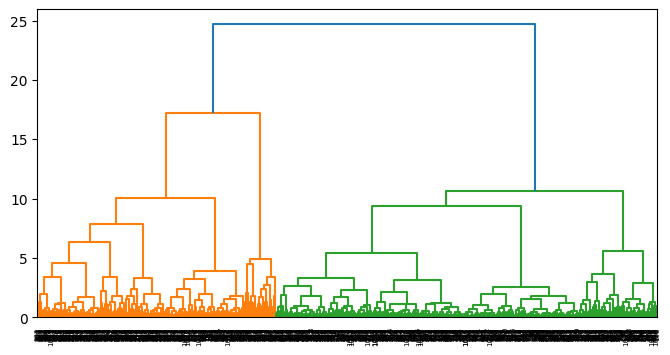

In [38]:
# 덴드로그램 시각화
plt.figure(figsize=(8, 4))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True, color_threshold=18)
# orientation: 그리는 방향  show_leaf_counts: 말단노드 마다 샘플 개수  출력  color_threshold: y축 기준 -> 18이상은 색상으로 표현x
plt.show()

- 18을 기준으로 해서 2개의 군집으로 나누어진 것을 볼 수 있다
- 3개의 군집이 괜찮아 보임 -> 절대적인 지표는 아니라는 점

### 4.2 실루엣 지수 분석
- 위에서 봤던 덴드로그램만으로는 "잘 나누었는가?"에 대해 판단은 어려움
- 그래서 군집 평가 요소 중 하나로 실루엣 지수 분석!

In [39]:
from sklearn.cluster import AgglomerativeClustering # 병합 군집
from sklearn.metrics.cluster import silhouette_score # 평균 실루엣 계수 계산하는 도구

In [40]:
# 1. 클러스터 생성(초기화)
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')   # linkage: 군집방식
# 2. 클러스터링(군집화)
cluster_label = cluster.fit_predict(list(df['vector']))   # fit와 동시에 predict 수행
cluster_label  #--> 예측값/클러스터링 구분값(결과)

array([1, 1, 1, ..., 1, 0, 0])

In [41]:
# 3. 평균 실루엣 지수 계산
silhouette_score(list(df['vector']), cluster_label)  # silhouette_score(실제값, 예측된 값)

0.34588557

##### 실루엣 지수
- -1 ~ 1 사이의 값
- 1에 가까울수록 잘 나누었다라고 판단할 수 있음
- 0에 가까울수록 애매하게 나누었다고 판단
- -1에 가까울수록 잘 못 나누었다고 판단

In [42]:
# n_clusters = 3일 때
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')   # linkage: 군집방식
cluster_label = cluster.fit_predict(list(df['vector']))   # fit와 동시에 predict 수행
silhouette_score(list(df['vector']), cluster_label)

0.3646805

In [43]:
# 각 군집 개수별로 평균 실루엣 지수 확인
n_clusters = range(2,10) # 확인할 군집 개수
scores = []              # 평균 실루엣 지수를 담아둘 리스트
for n in n_clusters:
  cluster = AgglomerativeClustering(n_clusters=n, linkage='ward')      # 1. 클러스터 초기화
  cluster_label = cluster.fit_predict(list(df['vector']))              # 2. 클러스터링(군집화)
  silhouette_avg = silhouette_score(list(df['vector']), cluster_label) # 3. 평균 실루엣 지수 계산
  scores.append(silhouette_avg)

scores

[0.34588557,
 0.3646805,
 0.27848372,
 0.23435771,
 0.19830094,
 0.20479706,
 0.20286173,
 0.20083304]

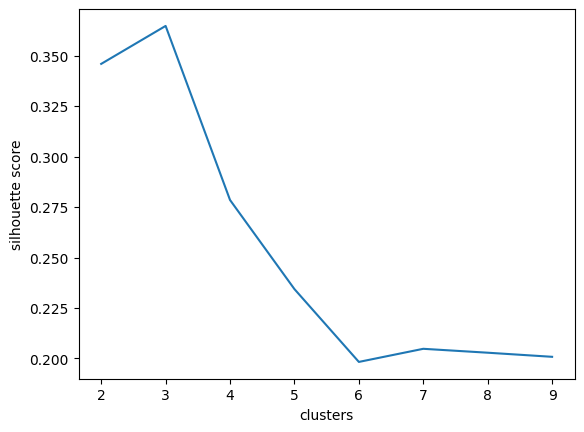

In [44]:
plt.plot(n_clusters, scores)
plt.xlabel('clusters')
plt.ylabel('silhouette score')
plt.show()

- 실루엣 지수와 덴드로그램을 관측해본 결과, 최적의 군집은 3이라고 판단 됨

In [45]:
from shrd.plot.silhouette_plot import visualize_silhouette

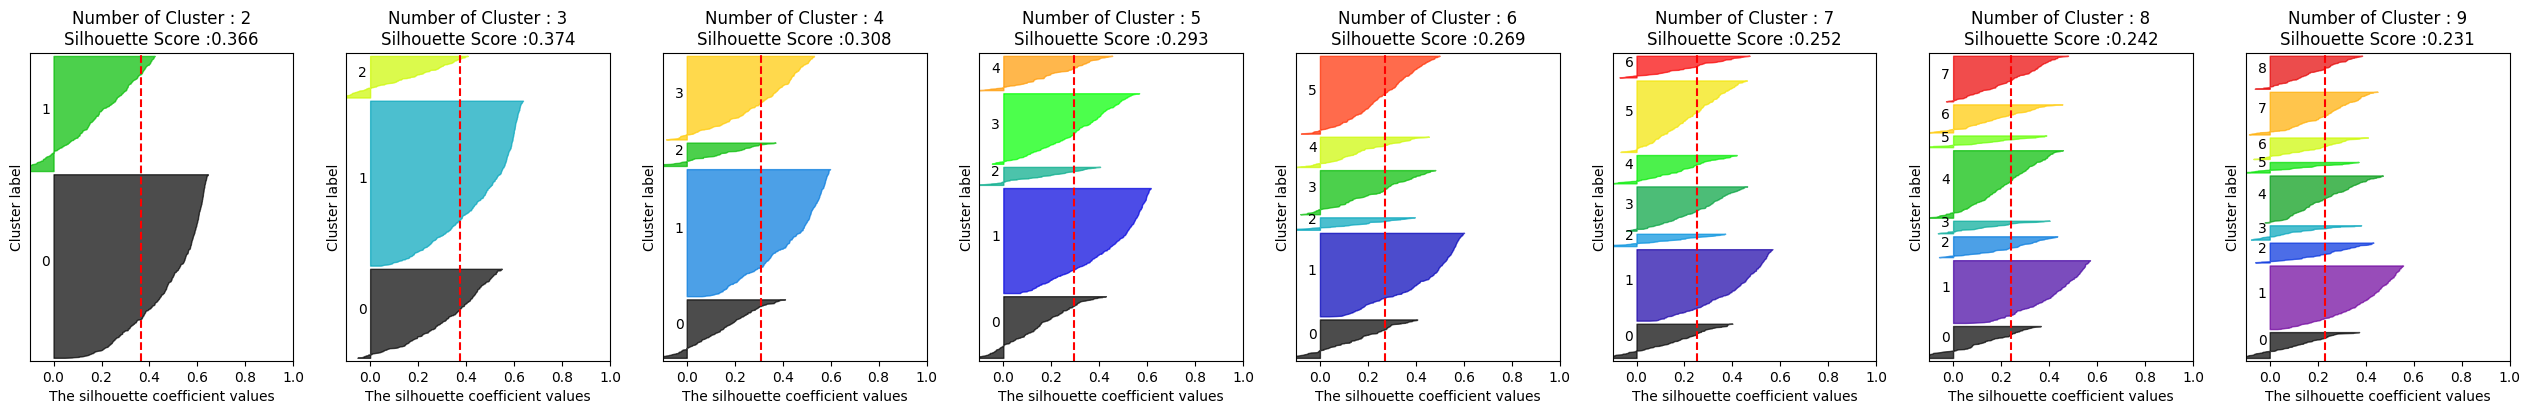

In [46]:
visualize_silhouette(n_clusters, list(df["vector"]))
# 평균 실루엣 지수는 가장 높은 게 3의 군집이었음
# But, 실루엣 다이어그램을 확인해본 결과, 0번 클러스터링이 뾰족한 칼날을 가지고 있었음

# 군집 성능 우수 조건
# - 평균 실루엣 지수가 높은 편(높다고 항상 좋은 것은 아님)
# - 군집별 데이터 개수가 유사
# - 음수 값이 적은 것
# - 뾰족한 칼날보단 완만한 칼날을 선호

- 빨간 선은 평균 실루엣 지수

In [47]:
# 최적의 군집수는 2로 판단!
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster_label = cluster.fit_predict(list(df["vector"]))

In [48]:
# 추가
df['cluster'] = cluster_label
df.head(3)

,time,review,review_clean,tagged_review,vector,cluster
0,2023. 5. 30. 17:09,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 ...,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 ...,"[가계부, 지출, 생활비, 정산, 만, 원, 가계부, 인, 가구, 자취, 생활비, ...","[-0.012984784, -0.0019491136, 0.0038602513, -0...",1
1,2022. 10. 9. 22:41,신혼부부가계부 신혼부부 가계부화목 화목 신혼부부 가계부입당 화연휴 끝나고 오랜만에 ...,신혼부부가계부 신혼부부 가계부화목 화목 신혼부부 가계부입당 화연휴 끝나고 오랜만에 ...,"[신혼부부, 가계부, 신혼부부, 가계부, 화목, 화목, 신혼부부, 가계부, 입당, ...","[-0.025700234, -0.024288818, 0.0008747794, -0....",1
2,2022. 7. 2. 4:34,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 ...,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 ...,"[예금, 진실, 문득, 투자, 경제, 흐름, 알다, 예금, 안정, 이자, 바라보다,...","[0.014047285, 0.010875911, -0.007814948, -0.00...",1


### 군집 결과까지 저장

In [49]:
import pickle

with open("./data/군집결과.pkl","wb") as f:
  pickle.dump(df, f)

```
with open("./data/군집결과.pkl","rb") as f:
  df = pickle.load(f)
```

## 5. 해석하기 : TF-IDF
- 5.1 TF-IDF 계산
- 5.2 DataFrame에 추가

### 5.1 TF-IDF 계산
- 각 클러스터마다 TF-IDF가 높은 단어를 찾기

In [50]:
all_doc = []

for i in df['cluster'].unique():
  # 각 클러스터를 하나의 문서로 가정
  # df에서 각 문서에 대해 불리안 인덱싱 수행 -> 키워드 접근
  pos_tagged = df[df['cluster']==i]["tagged_review"]

  cluster_doc = '' # 동일 문서 내에 모든 키워드를 하나로 합치기 위한 비어있는 문자열 초기화
  for pos in pos_tagged:
    doc = ' '.join(pos)   # list에서 키워드들을 하나의 문자열로 형변환
    cluster_doc += doc    # 클러스터별 문서들을 만들기 위해 하나로 이어붙이기

  all_doc.append(cluster_doc)

In [51]:
all_doc[0]

'가계부 지출 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 아끼다 고정 지출 생활비 아끼다 무 지출 직장인 짜다 테크 벌써 가계부 작성 한지 개월 되어다 생활비 원 생활비 원 생활비 지난달 대비 원 바 가계부 쓰다 게 의미 없다 정도 로비 슷 개월 사실 달 초 저녁 약속 시험 원서 접수 비 고양이 용품 화끈하다 돈 써다 버리다 때문 남다 달 쪼들리다 사람 이츠미 달 당근 거래 무려 원 벌다 당근 거래 처음 해보다 떨리다 애송이 중고 거래 만렙 되어다 달 갑작스럽다 생기다 약속 서예 비용 벗어나다 힐링 수 좋다 지출 보다 고양이 모래 달 만 원 들다 줄 모르다 고양이 간식 밥 장난감 아니다 모래 제일 비싸다 달 타투 안 전월 덜 써다 거 말 후회 전혀 없다 이제 가계부 작성 아니다 분석 외식 식비 공부 고양이 약 약속 줄이다 답 없다 물가 후 덜덜 여름 휴가 제외 공부 열중 터 생활비 만 원 목표 보다 파이팅신혼부부 가계부 신혼부부 가계부 화목 화목 신혼부부 가계부 입당 화 연휴 끝나다 만 출근 힘들다 힘드다 몸 이끌다 끌리다 필라테스 다녀오다 싶다 식빵 들다 집 저녁 김치찌개 손목 아프다 발목 점점 아프다 출근길 포인트 발목 보호대 구매 출근 못 퇴근 후 오후 병원 가다 퇴근 낫다 그냥 집 서다 쉬다 저녁 먹다 야식 시장 곱창 목또 아침 일어나다 발목 아프다 출근 못 출근 전 병원 가다 처방 받다 여기저기 아프다 곳 없다 퇴근 만 샐러드 토 포샵 겅 부다 음주 포토샵 일러스트 학원 다니다 틈틈하다 유튭 보고 공부 경제적자유 앞당기다예금 진실 문득 투자 경제 흐름 알다 예금 안정 이자 바라보다 적금 투자 처 찾다 예금 누군가 투자 처 찾다 예금 빌리다 투자 알 되어다 알 진실카카오 뱅크 청년 전세 자금 대출 연장 금리 변동 카카오 뱅크 청년 전세 자금 대출 서류 금리 승인 받다 오다 만 쓴다 대다 초반 자취 년차 햇수 년차 그동안 계속 고시원 원룸 룸 월세 살 카카오 뱅크 청년 전세 자금 대출 서류 금리 승인 받다 날짜 대출 받다 맨 위 뜨다 대출 진짜

In [52]:
len(all_doc)

2

In [53]:
df.head()

,time,review,review_clean,tagged_review,vector,cluster
0,2023. 5. 30. 17:09,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 ...,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 ...,"[가계부, 지출, 생활비, 정산, 만, 원, 가계부, 인, 가구, 자취, 생활비, ...","[-0.012984784, -0.0019491136, 0.0038602513, -0...",1
1,2022. 10. 9. 22:41,신혼부부가계부 신혼부부 가계부화목 화목 신혼부부 가계부입당 화연휴 끝나고 오랜만에 ...,신혼부부가계부 신혼부부 가계부화목 화목 신혼부부 가계부입당 화연휴 끝나고 오랜만에 ...,"[신혼부부, 가계부, 신혼부부, 가계부, 화목, 화목, 신혼부부, 가계부, 입당, ...","[-0.025700234, -0.024288818, 0.0008747794, -0....",1
2,2022. 7. 2. 4:34,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 ...,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 ...,"[예금, 진실, 문득, 투자, 경제, 흐름, 알다, 예금, 안정, 이자, 바라보다,...","[0.014047285, 0.010875911, -0.007814948, -0.00...",1
3,2022. 7. 6. 5:19,카카오뱅크 청년전세자금대출 연장 년 금리변동 카카오뱅크 청년전세자금대출 서류금리...,카카오뱅크 청년전세자금대출 연장 년 금리변동 카카오뱅크 청년전세자금대출 서류금리...,"[카카오, 뱅크, 청년, 전세, 자금, 대출, 연장, 금리, 변동, 카카오, 뱅크,...","[0.08046037, 0.08416607, -0.055621043, -0.0325...",1
4,2022. 8. 15. 18:08,우당탕탕 다신 안가고싶은 삼성병원 가지베이컨그라탕해먹기 미친 폭우랑 전쟁하기 ...,우당탕탕 다신 안가고싶은 삼성병원 가지베이컨그라탕해먹기 미친 폭우랑 전쟁하기 ...,"[탕, 다시다, 가다, 삼성, 병원, 가지, 베이컨, 그라탕, 해, 먹기, 미치다,...","[-0.071747206, -0.04456087, 0.0030709528, -0.1...",1


- 각각의 병합된 문서(all_doc) 별로 TF-IDF 계산

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
# 초기화
vectorizer=TfidfVectorizer()

# 단어사전 등록과 함께 변환
tfidf_vector = vectorizer.fit_transform(all_doc)

# 단어사전 확인
print(vectorizer.vocabulary_)

{'가계부': 5, '지출': 16634, '생활비': 9527, '정산': 15694, '가구': 11, '자취': 15015, '식비': 11009, '아끼다': 11468, '고정': 1159, '직장인': 16693, '짜다': 16866, '테크': 18598, '벌써': 7649, '작성': 15044, '한지': 19946, '개월': 538, '되어다': 4499, '지난달': 16505, '대비': 3940, '쓰다': 11408, '의미': 14182, '없다': 12412, '정도': 15658, '로비': 5331, '사실': 9017, '저녁': 15346, '약속': 12070, '시험': 10983, '원서': 13690, '접수': 15626, '고양이': 1125, '용품': 13445, '화끈하다': 20632, '써다': 11355, '버리다': 7566, '때문': 4877, '남다': 2926, '쪼들리다': 16950, '사람': 8955, '이츠미': 14450, '당근': 3836, '거래': 623, '무려': 6551, '벌다': 7639, '처음': 17281, '해보다': 20116, '떨리다': 4940, '애송이': 11962, '중고': 16322, '만렙': 5769, '갑작스럽다': 386, '생기다': 9447, '서예': 9629, '비용': 8624, '벗어나다': 7685, '힐링': 21067, '좋다': 16087, '보다': 7838, '모래': 6326, '들다': 4664, '모르다': 6334, '간식': 270, '장난감': 15161, '아니다': 11478, '제일': 15839, '비싸다': 8605, '타투': 18440, '전월': 15507, '후회': 20910, '전혀': 15543, '이제': 14415, '분석': 8343, '외식': 13304, '공부': 1288, '줄이다': 16304, '물가': 6709, '덜덜': 4113, '여름': 12565, '휴가

In [59]:
# 학습된 단어사전 확인
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['가가', '가게', '가격', ..., '힛양', '힝구', '힝힝'], dtype=object)

In [61]:
# array 형변환
tfidf_array = tfidf_vector.toarray()
tfidf_array

array([[0.00121943, 0.0053655 , 0.01243821, ..., 0.        , 0.00024389,
        0.00034277],
       [0.00182426, 0.00851322, 0.01824262, ..., 0.00028488, 0.0002027 ,
        0.        ]])

### 5.2 DF 만들고 정렬하기

In [65]:
# df로 형변환
tfidf_df = pd.DataFrame(tfidf_array, columns=feature_names).T
tfidf_df

,0,1
가가,0.001219,0.001824
가게,0.005366,0.008513
가격,0.012438,0.018243
가격표,0.000000,0.001424
가계,0.002683,0.000811
...,...,...
힘차다,0.000244,0.000608
힘투자,0.000000,0.000285
힛양,0.000000,0.000285
힝구,0.000244,0.000203


In [70]:
# TF IDF 값이 높은 순으로 정렬 + 저장
for column in tfidf_df.columns:
  # 각 클러스터별 TF-IDF Seires를 내림차순 정렬
  clustering_tfidf = tfidf_df[column].sort_values(ascending=False)

  # 컬럼으로 따로 인덱스(단어사전들)들을 빼둔 뒤, Series를 DF로 변환
  clustering_tfidf = clustering_tfidf.reset_index()
  # 컬럼명 변경
  clustering_tfidf.columns = ['word', 'tfidf']
  # 저장
  clustering_tfidf.to_csv(f'./data/cluster{column}_TFIDF.csv', encoding='UTF-8', index=False)

In [71]:
clustering_tfidf

,word,tfidf
0,먹다,0.322286
1,보다,0.314584
2,가다,0.237357
3,없다,0.226817
4,좋다,0.189318
...,...,...
21082,목눈,0.000000
21083,목뒤,0.000000
21084,정교하다,0.000000
21085,정관,0.000000


- 각 클러스터 별로 페르서나 분석 & 정의 수행

In [73]:
cluster_0_df = pd.read_csv('./data/cluster0_TFIDF.csv')
cluster_1_df = pd.read_csv('./data/cluster1_TFIDF.csv')
cluster_1_df.head()

,word,tfidf
0,먹다,0.322286
1,보다,0.314584
2,가다,0.237357
3,없다,0.226817
4,좋다,0.189318


- 주요 키워드들이 들어간 실제 리뷰 데이터 확인해보기

In [77]:
# 0번째 문서(클러스터)에서 상위 30개 주요 키워드 추출
top_keywords = cluster_0_df['word'].head(30).to_list()
print(top_keywords)

['보다', '먹다', '없다', '생각', '않다', '가다', '좋다', '들다', '받다', '싶다', '지출', '아니다', '쓰다', '자다', '만원', '적금', '그렇다', '오다', '많다', '진짜', '가계부', '사람', '시작', '되어다', '해보다', '모으다', '써다', '나오다', '주다', '정도']


In [79]:
# 문자열 검색
df['review_clean'].str.contains('보다', case=False, # 대소문자 구분 여부
                                na=False # 결측치는 False로 처리
                                )

,review_clean
0,True
1,False
2,False
3,False
4,False
...,...
1014,False
1015,False
1016,True
1017,True


In [84]:
# 각 키워드가 포함된 실제 리뷰("review_clean") 출력
for keyowrd in top_keywords:
  print(f'===========키워드 : {keyowrd} ===========')

  # review_clean 컬럼(tagged_review는 리스트라서, str로 형변환 이후 가능)을 기준으로 키워드가 포함 된 원본 데이터 필터링
  filtered_reviews = df[df['review_clean'].str.contains(keyowrd, case=False, na=False)]
  # 걸러지는 리뷰가 없는 경우를 고려해서 조건문으로 각각 출력
  if filtered_reviews.empty : # 비어있니?
    print('해당 키워드를 포함하는 리뷰가 없습니다.\n')
  else:
    for review in filtered_reviews['review_clean'].head(5):
      print(review)
    print()

===========키워드 : 보다 ===========
나의 가계부 지출  년 월 생활비 정산 만 원 가계부  인 가구 자취 생활비 식비 아끼기 고정지출 생활비 아끼기 무지출 직장인 짠테크 벌써 가계부를 작성한지 개월이 되었습니다월 생활비 원 월 생활비 원 월 생활비 원지난달 대비 원 오바가계부를 쓰고 있다는 게 의미가 없을 정도로비슷비슷한 개월 사실 이번 달 초부터저녁 약속 시험 원서 접수비 고양이 용품 등화끈하게 돈을 써버렸기 때문에남은 한 달을 쪼들린 사람 이츠미 그래도 이번 달은 당근 거래로무려 원이나 벌었답니다당근 거래 처음 해봐서떨려 했던 애송이는 중고거래 만렙이 되었습니다 이번 달은 갑작스럽게 생긴 약속이 있어서예상 비용은 벗어났지만그래도 힐링할 수 있어서 좋은 지출이었다고 봅니다 고양이 모래가 한 달에 만 원씩 들 줄은 몰랐습니다고양이 간식 밥 장난감도 아닌모래가 제일 비쌉니다 이번 달에 타투를 안 했다면 전월보다덜 썼던 거였는데 말이죠 하하후회는 전혀 없습니다이제부터는그저 가계부를 작성하는 것이 아닌분석을 해야겠습니다 외식 식비 공부 고양이 약 기타 약속을 줄이는 것밖에는 답이 없습니다물가가 후덜덜하네요월은 여름휴가 제외하고는공부에 열중할 터라생활비 만 원으로 목표해 보겠습니다파이팅 
  직장인은 잠을 줄여야 한다 갓생살기 갓생살기 미라클 모닝시에 일어나 공복에 애플 사이다 식초 콜라겐 엘 카르니틴에 올가닉 콜드브루를 먹었다 그러고 나서 사이클을 타며 이 글을 쓴다 사진엔 안 보이지만 홍삼 글루타티온 잔티젠 등등 엄마가 배탈 나겠다며 새벽 시 분까지는 출근해야 하는 직장 특성상 시에는 일어나야 한다 그마저도 배가 아프다든지 갑자기 화장실에 가야 한다든지 하는 중간 변수가 생기면 일이 꼬여버린다 출근 전 여유 있게 풀 메이크업을 한다든지 간단히 독서 혹은 홈트라도 하려 하면 시에는 일어나야더욱이 화 목에는 영어학원을 가기 때문에 집에 오면 시가 훌쩍 넘는다 많아야 시간만 자고 출근하는 날이 종종 있다 오전 근무가 시간은 여유롭고 아침형 인간이 

In [83]:
df[df['review_clean'].str.contains('보다', case=False, na=False)]

,time,review,review_clean,tagged_review,vector,cluster
0,2023. 5. 30. 17:09,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 ...,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 ...,"[가계부, 지출, 생활비, 정산, 만, 원, 가계부, 인, 가구, 자취, 생활비, ...","[-0.012984784, -0.0019491136, 0.0038602513, -0...",1
5,2022. 9. 24. 15:01,직장인은 잠을 줄여야 한다 갓생살기 갓생살기 미라클 모닝시에 일어나 공복에 애플...,직장인은 잠을 줄여야 한다 갓생살기 갓생살기 미라클 모닝시에 일어나 공복에 애플...,"[직장인, 잠, 줄이다, 생, 살기, 생, 살기, 미라클, 모닝, 시, 일어나다, ...","[-0.08399953, -0.08045556, 0.01994089, -0.1129...",1
7,2022. 6. 8. 20:45,시작 게을러져서 아니면 글 못씀 주에 한 번 써야되는거같은데 상품은 ...,시작 게을러져서 아니면 글 못씀 주에 한 번 써야되는거같은데 상품은 ...,"[시작, 게으르다, 아니다, 글, 쓰다, 주, 번, 써다, 상품, 받다, 다시, 번...","[-0.05975427, -0.010989733, -0.028566122, -0.1...",0
8,2022. 7. 24. 12:02,차 이번 주에 무엇을 했나요 주차 했다 갔다 샀다 먹었다 봤다 ...,차 이번 주에 무엇을 했나요 주차 했다 갔다 샀다 먹었다 봤다 ...,"[차, 주, 주차, 가다, 사다, 먹다, 보다, 구별, 특별하다, 날, 감정, 치료...","[0.026736684, 0.04738237, -0.062410545, -0.092...",1
9,2022. 10. 5. 22:30,월 편의점 짱구스트랩 새마을금고 예금 어제 미뤘던 할 일은행가기를 했다최근에 적금도...,월 편의점 짱구스트랩 새마을금고 예금 어제 미뤘던 할 일은행가기를 했다최근에 적금도...,"[편의점, 짱구, 스트랩, 새마을금고, 예금, 어제, 미루다, 은행가, 기르다, 최...","[0.054906677, 0.04896361, -0.0751106, -0.04115...",1
...,...,...,...,...,...,...
1011,2022. 10. 12. 10:20,탕진잼 근데 원서비가 인 수학교를 갔어유 아침이 조금 늦게 나오고 버스 기...,탕진잼 근데 원서비가 인 수학교를 갔어유 아침이 조금 늦게 나오고 버스 기...,"[탕진, 잼, 비, 인, 학교, 가다, 어유, 아침, 늦다, 나오다, 버스, 기다리...","[-0.06984109, -0.08053596, 0.018589206, -0.104...",1
1012,2022. 7. 27. 13:01,아홉번째 제출합니다 생일축하 아 날씨 진짜 미친듯물 속에서 숨 쉬는 기분누...,아홉번째 제출합니다 생일축하 아 날씨 진짜 미친듯물 속에서 숨 쉬는 기분누...,"[제출, 생일, 축하, 날씨, 진짜, 미치다, 물, 속, 숨, 쉬다, 기분, 누가,...","[-0.068311624, -0.021335324, -0.014050578, -0....",0
1013,2023. 1. 18. 17:40,적금 만기 봄동전 육전 브레인스토밍 회의 후 정리한 내용을 우두머리님들께 드렸는데...,적금 만기 봄동전 육전 브레인스토밍 회의 후 정리한 내용을 우두머리님들께 드렸는데...,"[적금, 만기, 봄, 동전, 육전, 브레인스토밍, 회의, 후, 정리, 내용, 우두머...","[0.037358835, 0.04841747, -0.06427054, -0.0659...",1
1016,2023. 4. 3. 14:11,청년전세임대주택 청약 일정 신청 서울특별시 순위로 청약 신청 위치한국토지주택공사...,청년전세임대주택 청약 일정 신청 서울특별시 순위로 청약 신청 위치한국토지주택공사...,"[청년, 전세, 임대주택, 청약, 일정, 신청, 서울특별시, 순위, 청약, 신청, ...","[0.1293653, 0.12770444, -0.09480212, -0.067050...",1


> **1. 페르소나 한 줄 정의**  
> - **“디지털 금융 도구를 적극 활용하며, 절약과 재테크에 열정적인 젊은 도시 직장인”**

> **2. Desire (욕구)**  
> - 재정적 안정과 경제적 독립 달성  
> - 불필요한 소비를 줄이고 체계적으로 저축·투자하여 미래 자산을 늘리고 싶음  
> - 자기계발과 목표 달성을 통한 자존감 향상

> **3. 페르소나가 해결하고자 하는 문제**  
> - 월급 대비 늘어나는 고정·변동 지출로 충분한 저축이 어려움  
> - 충동 소비 및 소액 지출이 누적되어 예산 관리에 어려움을 겪음  
> - 시간 부족과 스트레스로 인해 체계적인 재정 관리가 미흡함

> **4. 페르소나 군에 집중해야 하는 이유**  
> - 초기 경력, 신혼, 자취 생활 등 경제적 부담이 큰 젊은 층으로 앞으로 금융 시장의 성장 잠재력이 큼  
> - 디지털 네이티브로 금융 앱, 가계부 등 디지털 솔루션에 높은 수용력 보유  
> - 자기계발 및 재테크에 대한 관심이 높아 새로운 서비스 도입 시 적극적으로 참여할 가능성이 큼

> **5. 디지털 환경 (Artifacts)**  
> - 모바일 금융 앱(토스, 카카오뱅크 등)과 디지털 가계부(엑셀 템플릿, 재테크 앱)  
> - 유튜브, SNS, 온라인 재테크 커뮤니티 등을 통한 정보 습득 및 공유  
> - 스마트폰과 노트북 등 디지털 기기를 일상에서 적극 활용

> **6. 인구 통계학적 특성**  
> - **성별:** 남녀 모두 (특히 신혼부부, 자취하는 청년층)  
> - **나이:** 20대 후반 ~ 30대 초반  
> - **직업:** 신입·초기 경력 직장인, 대학생, 신혼부부  
> - **재산/소득:** 월급은 있으나 초기 자산은 낮고, 생활비·월세 등 고정비 부담이 큼  
> - **가족 구성:** 미혼 또는 신혼, 소규모 가구, 자취 생활  
> - **준거 집단:** 재테크 및 절약에 관심 있는 또래, 온라인 커뮤니티 구성원  
> - **신체/건강:** 보통이지만 가끔 과로, 스트레스로 인한 건강 이슈 존재  
> - **취미:** 재테크, 소비 분석, 가계부 작성, 운동, 카페 탐방, 여행 등  
> - **MBTI:** 분석적·계획적인 성향 (예: INTJ, ISTJ)  
> - **식생활:** 외식을 줄이고 집밥이나 도시락 위주로 소비, 건강과 절약을 중시

> **7. 상황 맥락적**  
> - 대도시(서울 등)에서 높은 생활비와 월세 부담 속에 자취 및 신혼 생활  
> - 업무와 자기계발, 취미 사이에서 제한된 시간과 에너지로 재정 관리를 시도  
> - 디지털 금융·재테크 도구를 통해 매일 소비 패턴을 분석하며 미래 준비

> **8. 심층적 특성**  
> - **가장 중요한 모순:** 안정적인 생활을 위해 절약해야 하지만, 동시에 새로운 경험과 소비 욕구를 자극받음  
> - **4D 공간별 욕구:**  
>     - *정신적 경험:* 규칙적인 운동과 건강 관리를 통해 신체의 활력과 에너지를 유지
>     - *물리적 경험:* 일상에서 직접 경험하는 신체적 활동과 환경   
>     - *문화적 경험:* 또래 및 커뮤니티와의 상호작용을 통해 경제적 자기계발과 사회적 트렌드를 체험
>     - *사회적 경험:* 디지털 금융 도구와 재정 관리 시스템을 활용해 효율적인 생활 관리 환경을 구축
> - **주요 가치 키워드:** 절약, 재테크, 자기계발, 효율성, 경제적 독립  
> - **미성숙한 라인:** 때때로 감정에 휩쓸려 충동 지출 발생  
> - **가장 생기있게 만드는 모멘트:** 월급날 목표 저축액을 달성하거나 재테크 성과를 확인할 때

> **9. 추가 분석 포인트**  
> - 디지털 금융 서비스와 재테크 앱에 대한 높은 관심과 빠른 적응력  
> - 시간과 에너지 관리에 어려움을 겪으며, 스트레스와 건강 문제도 소비 패턴에 영향을 미침  
> - 또래 및 온라인 커뮤니티와의 상호작용을 통해 정보와 동기 부여를 받고 있음  
> - 개인화된 재정 관리 솔루션 및 건강 관리와 연계된 통합 라이프스타일 관리 서비스에 기회가 있음